In [9]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!unzip /content/drive/MyDrive/har70.zip

Archive:  /content/drive/MyDrive/har70.zip
   creating: har70plus/
  inflating: har70plus/515.csv       
  inflating: har70plus/516.csv       
  inflating: har70plus/512.csv       
  inflating: har70plus/502.csv       
  inflating: har70plus/518.csv       
  inflating: har70plus/514.csv       
  inflating: har70plus/511.csv       
  inflating: har70plus/504.csv       
  inflating: har70plus/517.csv       
  inflating: har70plus/501.csv       
  inflating: har70plus/509.csv       
  inflating: har70plus/506.csv       
  inflating: har70plus/503.csv       
  inflating: har70plus/505.csv       
  inflating: har70plus/513.csv       
  inflating: har70plus/508.csv       
  inflating: har70plus/510.csv       
  inflating: har70plus/507.csv       


Data Preprocessing

In [12]:
df = pd.read_csv('/content/har70plus/501.csv')

In [13]:
df.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2021-03-24 14:42:03.839,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6
1,2021-03-24 14:42:03.859,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6
2,2021-03-24 14:42:03.880,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6
3,2021-03-24 14:42:03.900,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6
4,2021-03-24 14:42:03.920,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6


In [14]:
df.shape

(103860, 8)

In [15]:
df_1 = pd.read_csv('/content/har70plus/517.csv')

In [16]:
df_1.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2021-06-08 10:04:08.527,-0.984863,-0.089600,-0.308105,-0.944092,-0.124268,0.017578,6
1,2021-06-08 10:04:08.546,-0.985840,-0.075928,-0.309082,-0.995361,-0.098389,0.014160,6
2,2021-06-08 10:04:08.566,-0.972168,-0.059814,-0.292480,-1.005127,-0.079102,0.028809,6
3,2021-06-08 10:04:08.586,-0.955322,-0.057861,-0.305176,-0.925049,-0.075684,0.048096,6
4,2021-06-08 10:04:08.607,-0.954590,-0.058105,-0.310791,-0.935547,-0.123047,0.001709,6


In [17]:
df_1.tail()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
147040,2021-06-08 10:54:18.006,-1.061035,-0.028564,-0.311768,-1.264404,-0.308838,0.161865,1
147041,2021-06-08 10:54:18.027,-1.058105,0.030762,-0.292480,-0.917725,-0.214111,0.133545,1
147042,2021-06-08 10:54:18.047,-1.111572,0.077637,-0.296387,-0.903809,-0.222656,-0.004639,1
147043,2021-06-08 10:54:18.066,-1.157715,0.036133,-0.317139,-1.138672,-0.262451,-0.151855,1
147044,2021-06-08 10:54:18.086,-1.147461,-0.062988,-0.326660,-1.223389,-0.165039,-0.124268,1


In [18]:
df_1.shape

(147045, 8)

In [19]:
df.describe()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,103860.000000,103860.000000,103860.000000,103860.000000,103860.000000,103860.000000,103860.000000
mean,-0.880883,-0.069506,-0.003201,-0.794307,-0.095594,-0.318354,3.237069
std,0.340989,0.128599,0.417656,0.599406,0.210591,0.547369,2.860101
min,-2.895264,-1.157471,-2.204834,-7.942139,-3.600830,-4.193604,1.000000
25%,-1.015625,-0.137939,-0.268066,-1.003174,-0.187256,-1.046875,1.000000
50%,-0.920898,-0.062500,-0.136963,-0.937500,-0.080322,-0.131348,1.000000
75%,-0.767517,-0.006836,0.234375,-0.203125,-0.015625,0.080078,6.000000
max,0.239746,0.893555,0.979004,1.159424,3.234863,1.861572,8.000000


In [20]:
df.isnull()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
103855,False,False,False,False,False,False,False,False
103856,False,False,False,False,False,False,False,False
103857,False,False,False,False,False,False,False,False
103858,False,False,False,False,False,False,False,False


Collecting all dataFrame

In [21]:
# Specify the path to the directory containing your CSV files in Google Drive
data_dir = '/content/har70plus'

# Collect paths of all CSV files in the specified directory
lis_paths = []
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        if filename.endswith('.csv'):
            lis_paths.append(os.path.join(dirname, filename))

# Read CSV files into a dictionary
old_act_dfs = {}
for i, path in enumerate(lis_paths):
    temp = pd.read_csv(path)
    old_act_dfs[path.split('/')[-1].split('.')[0]] = temp
    print(path.split('/')[-1].split('.')[0], temp.shape)

511 (128063, 8)
517 (147045, 8)
502 (131367, 8)
516 (138278, 8)
513 (123599, 8)
510 (122061, 8)
505 (87006, 8)
507 (120125, 8)
508 (130494, 8)
503 (116413, 8)
504 (150758, 8)
514 (101510, 8)
509 (121763, 8)
501 (103860, 8)
515 (153517, 8)
506 (122714, 8)
512 (119310, 8)
518 (141714, 8)


In [22]:
df_keys = list(old_act_dfs.keys()) # getting list of all keys from dictionary
old_act_dfs['518'].sample(4)

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
43422,2021-06-11 10:39:17.958,-0.661377,-0.079346,0.726562,0.004395,0.000977,-0.999268,7
41473,2021-06-11 10:38:38.979,-0.676758,-0.063965,0.744385,0.004395,0.000977,-0.999268,7
131309,2021-06-11 11:09:27.259,-0.818848,0.386963,-0.437256,-2.290771,-0.662598,-0.659912,1
8824,2021-06-11 10:27:39.598,-0.630859,-0.189453,0.748291,-0.012207,0.078613,-0.981201,7


Check all null values


In [23]:
for key,value in old_act_dfs.items():
    print(key,value.isnull().sum())

511 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
517 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
502 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
516 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
513 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
510 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
505 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
507 timestamp    0
back_x       0
back_y 

No Null values are present the data is cleaned

No need of timestamp

In [24]:
for key,value in old_act_dfs.items():
    old_act_dfs[key] = value.drop('timestamp',axis='columns')

Combining all dataset

In [25]:
df_final = old_act_dfs[df_keys[0]]
for key in df_keys[1:]:
    df_final = pd.concat([df_final,old_act_dfs[key]],axis=0)
df_final.isnull().sum()

back_x     0
back_y     0
back_z     0
thigh_x    0
thigh_y    0
thigh_z    0
label      0
dtype: int64

In [26]:
df_final.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,-0.976807,0.051758,0.124023,-0.996582,0.016357,0.047607,6
1,-0.986328,0.044434,0.145996,-0.994141,-0.068359,0.105713,6
2,-0.983154,0.029541,0.170898,-0.994385,-0.109863,0.109375,6
3,-0.988770,0.036621,0.171143,-0.993408,-0.113037,0.125977,6
4,-1.001953,0.057373,0.189697,-1.010742,-0.098877,0.112549,6


In [27]:
df_final.shape

(2259597, 7)

Remove duplicates values

In [28]:
print("Duplicate values in df ----> ",df_final.duplicated().sum())
df_final = df_final.drop_duplicates() # dropped duplicate values from dataset

Duplicate values in df ---->  62611


In [29]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [30]:
labels_dic = {1:'walking',3:"shiuffling",4:"stairs (ascending)",5:"stairs (descending)",6:"standing",7:"sitting",8:"lying"}
labels_key = list(labels_dic.keys()) # convert to list, to make it easy to present through graph
labels_values = list(labels_dic.values()) # convert to list, to make it easy to present through graph
counts = []

for label,value in zip(labels_key,labels_values):
    counts.append(len(df_final[df_final['label']==label]))

print("sum of counts ---> ",sum(counts),"shape of df_final ---> ",df_final.shape)

# Creating the pie chart trace
trace = go.Pie(labels=labels_values, values=counts, hoverinfo='label+percent',
               textinfo='percent', textfont_size=12)

# Creating the layout
layout = go.Layout(title='each label density in percentage (%)')
# Creating the figure
fig = go.Figure(data=[trace], layout=layout)

# Displaying the figure
fig.show()

sum of counts --->  2196986 shape of df_final --->  (2196986, 7)


In [31]:
trace = go.Bar(x=labels_values, y=counts)

# Creating the layout
layout = go.Layout(title='Counts of all labels')

# Creating the figure
fig = go.Figure(data=[trace], layout=layout)

# Displaying the figure
fig.show()

In [32]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(df_final.drop('label',axis='columns'),df_final['label'],stratify=df_final['label'])
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1647739, 6), (549247, 6), (1647739,), (549247,))

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix,classification_report
from seaborn import heatmap as hp

In [32]:
algos = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier()]
models_trained = []
for algo in algos:
    print(str(algo))
    temp = algo.fit(X_train,y_train)
    models_trained.append(temp)
    print("traning score ----> ",temp.score(X_train,y_train))
    print("testing score ----> ",temp.score(X_test,y_test))

LogisticRegression()
traning score ---->  0.7617875161054026
testing score ---->  0.7613277814899307
DecisionTreeClassifier()
traning score ---->  1.0
testing score ---->  0.8970153683133454
RandomForestClassifier()
traning score ---->  0.9999854345864242
testing score ---->  0.9352932287295151


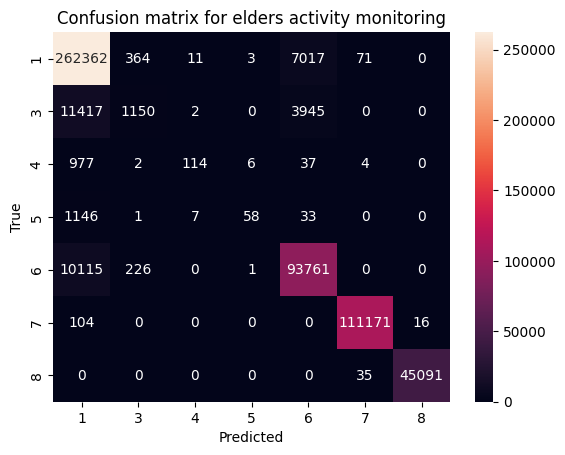

In [33]:
final_model = models_trained[-1]
y_pred = final_model.predict(np.array(X_test)) # Random forest trained model prediction on test data
cm = confusion_matrix(y_test,y_pred)

hp(cm,annot=True,fmt="",xticklabels=labels_key,yticklabels=labels_key)
plt.title("Confusion matrix for elders activity monitoring")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [34]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.92      0.97      0.94    269828
           3       0.66      0.07      0.13     16514
           4       0.85      0.10      0.18      1140
           5       0.85      0.05      0.09      1245
           6       0.89      0.90      0.90    104103
           7       1.00      1.00      1.00    111291
           8       1.00      1.00      1.00     45126

    accuracy                           0.94    549247
   macro avg       0.88      0.58      0.60    549247
weighted avg       0.93      0.94      0.92    549247



In [35]:
import joblib

joblib.dump(final_model,"elderly(human) activity monitoring system")

['elderly(human) activity monitoring system']

In [36]:
# how to predict activity on new data


In [37]:
# prompt: # how to predict activity on new data

new_data = pd.read_csv('/content/drive/MyDrive/new.csv')
new_data = new_data.drop('timestamp',axis='columns')
prediction = final_model.predict(np.array(new_data))
for i in prediction:
  print(labels_dic[i])


standing


In [ ]:
# prompt: make prediction by the already saved model

# Load the saved model
loaded_model = joblib.load("/content/elderly(human) activity monitoring system")

# New data to predict on
new_data = pd.read_csv("/content/drive/MyDrive/new.csv")

# Drop the timestamp column
new_data = new_data.drop("timestamp", axis=1)

# Make predictions
predictions = loaded_model.predict(np.array(new_data))

# Print the predicted activities
for prediction in predictions:
  print(labels_dic[prediction])


In [28]:
# prompt: run lstm on this dataset

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

# Ensure labels start from 0 and are consecutive
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(labels_key), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using encoded labels
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32)



Epoch 1/10
51492/51492 [==============================] - 452s 9ms/step - loss: 0.3250 - accuracy: 0.8867
Epoch 2/10
51492/51492 [==============================] - 429s 8ms/step - loss: 0.2592 - accuracy: 0.9161
Epoch 3/10
51492/51492 [==============================] - 423s 8ms/step - loss: 0.2476 - accuracy: 0.9202
Epoch 4/10
51492/51492 [==============================] - 438s 9ms/step - loss: 0.2419 - accuracy: 0.9215
Epoch 5/10
51492/51492 [==============================] - 435s 8ms/step - loss: 0.2375 - accuracy: 0.9228
Epoch 6/10
51492/51492 [==============================] - 426s 8ms/step - loss: 0.2349 - accuracy: 0.9235
Epoch 7/10
51492/51492 [==============================] - 428s 8ms/step - loss: 0.2327 - accuracy: 0.9241
Epoch 8/10
51492/51492 [==============================] - 431s 8ms/step - loss: 0.2312 - accuracy: 0.9246
Epoch 9/10
51492/51492 [==============================] - 429s 8ms/step - loss: 0.2297 - accuracy: 0.9250
Epoch 10/10
51492/51492 [=====================

In [33]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred_encoded = model.predict(X_test)
y_pred = y_pred_encoded.argmax(axis=1)

# Decode the predicted and actual labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(label_encoder.transform(y_test))

# Print classification report
print(classification_report(y_test_decoded, y_pred_decoded))



17164/17164 [==============================] - 61s 4ms/step
              precision    recall  f1-score   support

           1       0.91      0.97      0.94    269828
           3       0.59      0.01      0.01     16514
           4       0.68      0.05      0.10      1140
           5       0.41      0.01      0.01      1245
           6       0.87      0.89      0.88    104103
           7       1.00      1.00      1.00    111291
           8       1.00      1.00      1.00     45126

    accuracy                           0.93    549247
   macro avg       0.78      0.56      0.56    549247
weighted avg       0.92      0.93      0.91    549247



In [30]:
# prompt: save the lstm model

model.save("/content/drive/MyDrive/lstm_model.h5")


In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

In [35]:
# prompt: get prediction from above saved lstm model

# Load the saved LSTM model
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/lstm_model.h5")

# New data to predict on
new_data = pd.read_csv("/content/drive/MyDrive/new.csv")

# Drop the timestamp column
new_data = new_data.drop("timestamp", axis=1)

# Make predictions
predictions = loaded_model.predict(np.array(new_data))

# Print the predicted activities
for prediction in predictions:
  predicted_label = labels_key[np.argmax(prediction)]
  print(labels_dic[predicted_label])


1/1 [==============================] - 2s 2s/step
standing


In [27]:
import sklearn
print(sklearn.__version__)


1.2.2


In [36]:
!pip freeze > requirements.txt

In [37]:
# Verify the contents of requirements.txt
!cat requirements.txt

absl-py==1.4.0
aiohttp==3.9.5
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.15.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.8.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.6.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.18.1
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.1
cryptography==42.0.8
cuda-python==12.2.1
cudf-cu12 @ https://pypi.nvidia.c

In [39]:
!mv requirements.txt /content/drive/MyDrive

In [7]:
labels_dic = {1:'walking',3:"shiuffling",4:"stairs (ascending)",5:"stairs (descending)",6:"standing",7:"sitting",8:"lying"}
labels_key = list(labels_dic.keys()) # convert to list, to make it easy to present through graph

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.initializers import Orthogonal
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

In [14]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.initializers import Orthogonal
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Define a custom LSTM class to handle the 'time_major' argument
class CustomLSTM(LSTM):
    def __init__(self, units, **kwargs):
        if 'time_major' in kwargs:
            kwargs.pop('time_major')
        super().__init__(units, **kwargs)

# Register the custom objects
custom_objects = {'Orthogonal': Orthogonal, 'LSTM': CustomLSTM}

# Load the saved LSTM model with custom objects
loaded_model = load_model(
    "D:/Semester 7/Human_activity_recognition_system/models/lstm_model.h5",
    custom_objects=custom_objects
)

# New data to predict on
new_data = pd.read_csv("D:/Semester 7/Human_activity_recognition_system/test_data/new.csv")

# Drop the timestamp column
new_data = new_data.drop("timestamp", axis=1)

# Convert the new data to a numpy array
new_data_array = np.array(new_data)

# Make predictions
predictions = loaded_model.predict(new_data_array)



# Print the predicted activities
for prediction in predictions:
    predicted_label = labels_key[np.argmax(prediction)]
    print(labels_dic[predicted_label])


C:\Users\Perfect computers\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
sitting
